In [1]:
# Step 1: Load Model

from keras.models import load_model
model = load_model('poultry_model.h5')

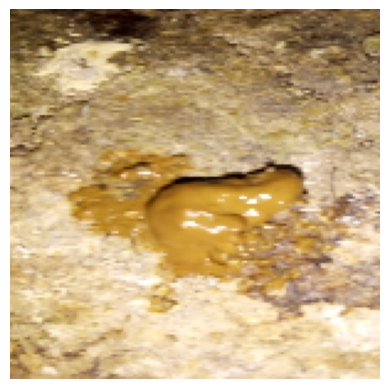

In [2]:
# Step 2: Load and Preprocess Test Image

from keras.preprocessing import image
import numpy as np 
import matplotlib.pyplot as plt

# Load an image
img_path = 'dataset_split/test/cocci/cocci.23.jpg'  # adjust path as needed
img = image.load_img(img_path, target_size=(150, 150))  # Use the size your model expects

# Show the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert to array and preprocess
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [3]:
# Step 3: Make Prediction & Print Confidence

classes = ['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella']
prediction = model.predict(img_array)[0]
predicted_index = np.argmax(prediction)
predicted_label = classes[predicted_index]
confidence = prediction[predicted_index] * 100

print("Predicted:", predicted_label)
print("Confidence:", f"{confidence:.2f}%")
print("\nAll class probabilities:")
for cls, prob in zip(classes, prediction):
    print(f"{cls}: {prob:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
Predicted: Coccidiosis
Confidence: 100.00%

All class probabilities:
Coccidiosis: 1.00
Healthy: 0.00
New Castle Disease: 0.00
Salmonella: 0.00


In [4]:
# Step 4 : Batch Test All Images in a Folder

import os
from keras.preprocessing import image
import numpy as np

# Path to your test set
base_path = 'dataset_split/test'

# Update class names and folder names accordingly
classes = ['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella']
folder_names = ['cocci', 'healthy', 'ncd', 'salmo']  # folder names that match your structure

for idx, folder_name in enumerate(folder_names):
    folder_path = os.path.join(base_path, folder_name)
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)[0]
        predicted_class = classes[np.argmax(prediction)]

        print(f"Actual: {classes[idx]} | Predicted: {predicted_class} | File: {file}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Actual: Coccidiosis | Predicted: Coccidiosis | File: cocci.1009.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Actual: Coccidiosis | Predicted: Coccidiosis | File: cocci.1015.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Actual: Coccidiosis | Predicted: Coccidiosis | File: cocci.1018.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Actual: Coccidiosis | Predicted: Coccidiosis | File: cocci.102.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Actual: Coccidiosis | Predicted: Coccidiosis | File: cocci.1023.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Actual: Coccidiosis | Predicted: Coccidiosis | File: cocci.1026.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Actual: Coccidiosis | Predicted: Coccidiosis | File: cocci.1041.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Actual: Coccidiosis | Predicted: Coccidiosis | File: cocci.1043.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Actual: Coccidiosis | Predicted: Coccidiosis | File: cocci.1048.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Actual: C

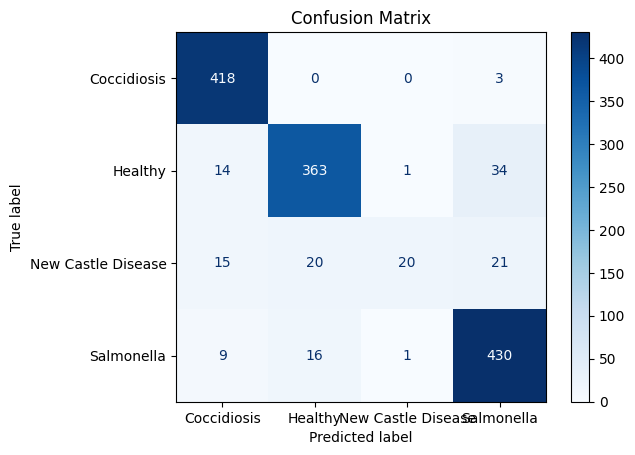

In [10]:
#  Step 5: Plot Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [11]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
# Calculating metrics
import os
from keras.preprocessing import image
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.models import load_model

# Load model once
model = load_model('poultry_model.h5')

# Define paths and classes
base_path = 'dataset_split/test'  # Adjust if needed
classes = ['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella']
folder_names = ['cocci', 'healthy', 'ncd', 'salmo']

# Initialize prediction lists
y_true = []
y_pred = []

# Iterate through test folders
for idx, folder_name in enumerate(folder_names):
    folder_path = os.path.join(base_path, folder_name)
    for file in os.listdir(folder_path):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):  # Filter valid images
            img_path = os.path.join(folder_path, file)
            img = image.load_img(img_path, target_size=(150, 150))  # Match training input
            img_array = image.img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            prediction = model.predict(img_array, verbose=0)[0]
            predicted_class = np.argmax(prediction)

            y_true.append(idx)
            y_pred.append(predicted_class)

# Compute Metrics
print(" Accuracy:", accuracy_score(y_true, y_pred))
print("\n Classification Report:\n", classification_report(y_true, y_pred, target_names=classes))
print("\n Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


 Accuracy: 0.9018315018315018

 Classification Report:
                     precision    recall  f1-score   support

       Coccidiosis       0.92      0.99      0.95       421
           Healthy       0.91      0.88      0.90       412
New Castle Disease       0.91      0.26      0.41        76
        Salmonella       0.88      0.94      0.91       456

          accuracy                           0.90      1365
         macro avg       0.90      0.77      0.79      1365
      weighted avg       0.90      0.90      0.89      1365


 Confusion Matrix:
 [[418   0   0   3]
 [ 14 363   1  34]
 [ 15  20  20  21]
 [  9  16   1 430]]


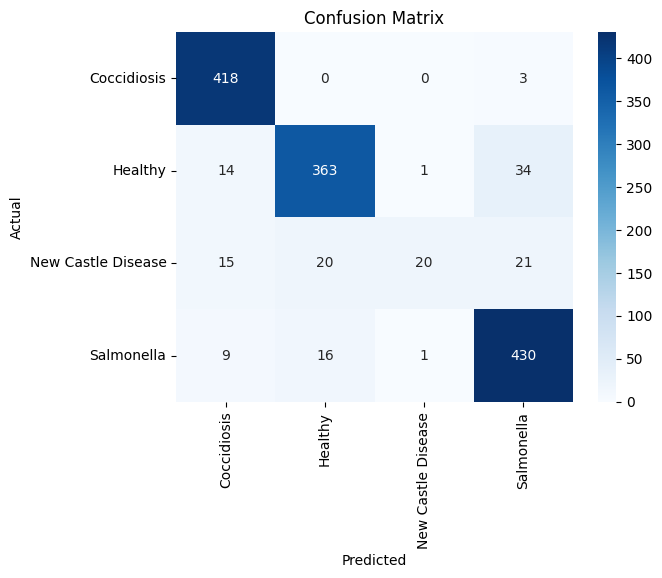

In [13]:
# Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [15]:
# Apply Data Augmentation to NCD Images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2
)

# Apply on the training generator for more variation
train_generator = datagen.flow_from_directory(
    'dataset_split/train', 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='categorical'
)


Found 5447 images belonging to 4 classes.


In [16]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\devis\AppData\Local\Temp\ipykernel_12416\2287734384.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
